---
 
## 1.移動平均法 
每個像素點 改用周圍3x3像素矩陣的平均值
這樣就可以均勻分配影像的灰階變化 使人看不見細小的雜訊


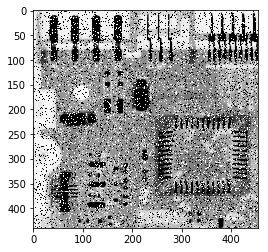

img size:  (440, 455)


In [23]:
#自己中心像素與鄰近的8個像素求出平均值 (kernal size 通常為奇數)
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt 

img = Image.open('中值濾波.bmp').convert('L')
plt.imshow(img,cmap='gray')
plt.show()

img = np.asarray(img)
print('img size: ',img.shape)

In [24]:
def smoothly(ori,kernal_size): #kernal size should be odd! 觀察後發現起始點都由對角線向右下延伸
    img = ori.copy()
    width = img.shape[1]
    height = img.shape[0]
    bias = int(kernal_size/2)
    for i in range(bias,height-bias):
        for j in range(bias,width-bias):
            kernal = img[i-bias:i+bias+1,j-bias:j+bias+1]#利用slicing切出kernal
            #print(i,j)
            #print(kernal)
            mean_efficent = np.mean(kernal)
            img[i,j] = mean_efficent
    
    return img


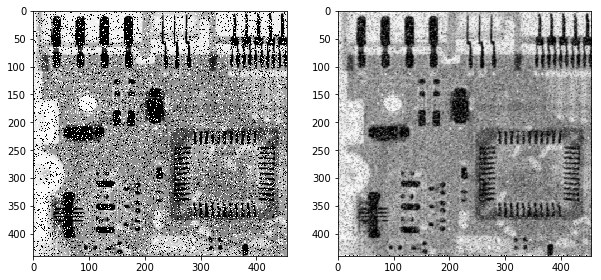

In [25]:
smooth = smoothly(img,3)

fig,(ori,after) = plt.subplots(1,2,figsize=(10,10))
ori.imshow(Image.fromarray(img),cmap = 'gray')
after.imshow(smooth,cmap = 'gray')
plt.show()

---
## 2.中值濾波法 median filter 
因為上一個移動平滑化 雖然能消除雜訊,但它沒辦法分辨邊緣
概念：將周圍的數值排序後取他的中位數 因為kernel掃過去數值很大的通常會被濾掉,也不會被選為修正的標準(因為雜訊通常都很大)

In [26]:
def median_filter(ori,kernel_size):
    img = ori.copy()
    bias = int(kernel_size/2)
    width = img.shape[1]
    height = img.shape[0]
    
    for i in range(bias,height-bias):
        for j in range(bias,width-bias):
            kernel = img[i-bias:i+bias+1,j-bias:j+bias+1]
            kernel = np.sort(kernel.ravel())
            median_value = int(np.median(kernel))
            img[i,j] = median_value
    return img 
            

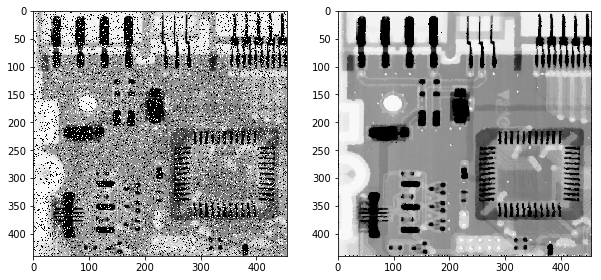

In [27]:
median = median_filter(img,3)

fig,(ori,after) = plt.subplots(1,2,figsize=(10,10))
ori.imshow(Image.fromarray(img),cmap = 'gray')
after.imshow(median,cmap = 'gray')
plt.show()
